<a href="https://colab.research.google.com/github/gbourzikas/QTR/blob/main/Bourzikas_QTR_Final_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Start Code

In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.metrics import classification_report, plot_confusion_matrix


In [20]:
df_Org = pd.read_csv('/content/drive/MyDrive/final_project.csv')

In [21]:
df_Org.head() 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [22]:
df_Org.shape

(160000, 51)

In [23]:
# Drop NA Rows
print("NA's In Dataset:",df_Org.isnull().sum().sum())

df_Org = df_Org.dropna()
print("After NA's Dropped:",(df_Org.isnull().sum().sum()))
print("Final Shape of Datframe:", df_Org.shape)

NA's In Dataset: 1608
After NA's Dropped: 0
Final Shape of Datframe: (158392, 51)


In [24]:
# Review Valuecounts
for columns in df_Org:
    print(df_Org[columns].value_counts())



-0.343737    1
-0.277255    1
 0.093831    1
-0.347379    1
 0.041180    1
            ..
-0.267501    1
 0.157664    1
 0.058046    1
 0.271365    1
 0.806262    1
Name: x0, Length: 158392, dtype: int64
 2.753232     1
 10.411656    1
-0.497376     1
-5.379456     1
-6.114450     1
             ..
 3.571226     1
-6.312343     1
 7.795734     1
 2.382735     1
-0.104553     1
Name: x1, Length: 158392, dtype: int64
 1.013149     1
-14.083205    1
-1.207091     1
-3.190369     1
-16.303680    1
             ..
-5.965018     1
-18.234312    1
 1.430004     1
-11.742846    1
-7.631792     1
Name: x2, Length: 158392, dtype: int64
 8.612018     1
 2.999966     1
-9.591580     1
 0.323170     1
 13.324483    1
             ..
-16.742501    1
 8.477979     1
 9.666829     1
-4.553361     1
 1.002264     1
Name: x3, Length: 158392, dtype: int64
-8.237243     1
-3.544970     1
-4.049198     1
 6.435219     1
 1.031178     1
             ..
-6.776208     1
 12.516159    1
-11.063872    1
 0.7062

In [25]:
# Attempted Feature Engineering

In [26]:
print("Did not Use this as it Didn't Improve Accuracy")
# df = df_Org.copy()
# df = df.rename(columns = {'x24': 'region', 
#                           'x29': 'month', 
#                           'x30': 'weekday', }, inplace = False)   

# catagorical_Variables = ['region','month','weekday']
# df_Catagorical_Only = df[catagorical_Variables]
# df_Catagorical_Only.dtypes
# df_Catgorical_DF = pd.get_dummies(df_Catagorical_Only, drop_first=True) # This has all the dummies


# # df_Catagorical_Only.dtypes
# # for columns in df_Catagorical_Only:
# #     print(df_Catagorical_Only[columns].value_counts())

# # Convert Numeric
# numberic_Variables = ['x37', 'x32']
# df_numerical_Only = df[numberic_Variables]
# df_numerical_Only['x37'] = df_numerical_Only['x37'].replace({'\$':''}, regex = True)
# df_numerical_Only['x37'] = df_numerical_Only['x37'].astype('float')
# df_numerical_Only['x32'] = df_numerical_Only['x32'].replace({'\%':''}, regex = True)
# df_numerical_Only['x32'] = df_numerical_Only['x32'].astype('float')


# # Get Disceet Values for Scaler
# df_Discreet = df.drop(labels=catagorical_Variables, axis=1)
# df_Discreet = df_Discreet.drop(labels=numberic_Variables, axis=1)
# df_Discreet = df_Discreet.drop('y', axis=1)

# # df_Discreet.head()
# # for columns in df_Discreet:
# #     print(df_Discreet[columns].value_counts())

# scaler = StandardScaler()
# df_Discreet_Scaled = scaler.fit_transform(df_Discreet)
# df_Discreet_Scaled = pd.DataFrame(df_Discreet_Scaled, columns = df_Discreet.columns)
# print("Scaled Discete", df_Discreet_Scaled.shape)




Did not Use this as it Didn't Improve Accuracy


In [27]:
# # Join Dataset
# df_Clean = pd.merge(df_Discreet_Scaled, df_Catgorical_DF, left_index=True, right_index=True) # Join Discreet/Scaled and Catagorical
# df_Clean = pd.merge(df_Clean, df_numerical_Only, left_index=True, right_index=True) # Joing Above with Numberical
# df_Clean['y'] = df_Org['y'] # ADD Y
# print("Cleaned Dataset Size:", df_Clean.shape)

In [28]:
# Coorelatoins

In [29]:
# # Test Coor
# # Coorelation
# correlated_features = set()

# correlation_matrix = df_Clean.corr()

# coor_Delete = .90
# corList = []
# for i in range(len(correlation_matrix.columns)):
# #     print("I", i) 
#     for j in range(i):
# #         print("J", j) 
# #             print("Val", abs(correlation_matrix.iloc[i, j])
#         if abs(correlation_matrix.iloc[i, j]) > coor_Delete: 
#             val= abs(correlation_matrix.iloc[i, j])
#             colname = correlation_matrix.columns[i]
#             corList.append({
#                 "colum_Name": colname, 
#                 "value_Corr": val})
#             correlated_features.add(colname)

# print("Number of Highly Correlated Features", len(correlated_features))
# correlated_features

# # X.drop(labels=correlated_features, axis=1, inplace=True)

In [30]:
# sns.pairplot(df_Clean[correlated_features])
# df_Corr = df_Clean.drop(['x41' ], axis=1) # Removed 1 Coorlate Feature
# # df_Corr = df_Clean.drop(['x41' ], axis=1) # Removed 1 Coorlate Feature
# df_Corr.head()

In [31]:
# #  From Dr. Drew Machine Learning 1 Class
# def exclude_high_freq(X_df: pd.DataFrame, freq_pct=.90, verbose=False):
#     """Dataset that excludes high-frequent fields"""
#     result = []
#     for col in X_df.columns:
#         df = X_df[col].value_counts().reset_index()
#         df.columns = ["value", "ct"]
#         df["Column"] = col
#         df["pct"] = df.ct / len(X_df)
#         result.append(df.head(5))

#     df_agg = pd.concat(result, axis=0).groupby(["Column"])["pct"].max()

#     cols_to_delete = df_agg[df_agg > freq_pct].index.values.tolist()
   
#     if verbose:
#         print("Columns we will delete:")
#         df = pd.concat(result, axis=0)
#         df["val-count"] = df["value"].astype(str) + " (" + round(df.pct,2).astype(str) + ")"
#         display(df[df["Column"].isin(cols_to_delete)].groupby(["Column"])["val-count"].apply(list))
   
#     X_df = X_df.drop(cols_to_delete, axis=1).copy()

       
#     return X_df

# df_HighFreq = exclude_high_freq(df_Corr, verbose=True)

# print("Shape Before High Frequency Fields Removed:", df_Corr.shape)
# print("Shape After High Frequency Fields Woudl be Remove:", df_HighFreq.shape)
# print("")
# print("*** Important *** After Further Review,  Not Removing Fields because these are the Get Dummy Numbers and are to be expected")

In [32]:
# # Finalize Dataset
# df_Final = df_HighFreq.copy()
# df_Final.head()

In [33]:
# Dropping Catagorical and Numberic Features

In [34]:
# Drop Datasets for Numerica and Catagorical
df_Final = df_Org.drop(['x37', 'x32', 'x24', 'x29', 'x30'], axis=1)

In [35]:
# Testing for Balance

In [36]:
df_Final['y'].value_counts()

0    94846
1    63546
Name: y, dtype: int64

In [37]:
# Setup DF

In [38]:
# Setup Dataset
X = df_Final
X = X.drop(['y'], axis=1)
y = df_Final['y']
y = y.astype('int')
print(X.shape)
len(y)

(158392, 45)


158392

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=76)
print('X', X.shape)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print("Test%", (X_test.shape[0]/X.shape[0]))
print("Train%", (X_train.shape[0]/X.shape[0]))

X (158392, 45)
X_train (110874, 45)
X_test (47518, 45)
y_train (110874,)
y_test (47518,)
Test% 0.3000025253800697
Train% 0.6999974746199303


In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=10000, random_state=447788)
lr_CVS = cross_val_score(lr, X, y, scoring='accuracy', error_score="raise", n_jobs=-1)
lr_CVS

array([0.7001168 , 0.70346286, 0.7022855 , 0.70253804, 0.7045268 ])

In [ ]:
# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
split = KFold(shuffle=True)
lasso_SC = LassoCV(cv = split)
lasso_SC.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+02, tolerance: 3.805e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=True))

In [ ]:
feature_List = []
for i in range(len(X.columns)):
    feature_List.append({
        'name': X.columns[i],
        'coef': lasso_SC.coef_[i]
        })
    

In [ ]:
features_SC = pd.DataFrame.from_dict(feature_List)
final_Features = features_SC.loc[features_SC["coef"] != 0,:]
final_Features.shape
final_Features

final_Features.sort_values(by='name', ascending=False)


,name,coef
9,x9,0.000007
8,x8,-0.000220
7,x7,-0.003202
6,x6,-0.001188
5,x5,-0.000006
44,x49,0.007517
43,x48,-0.012605
41,x46,-0.001047
37,x42,-0.001231
35,x40,-0.000712


In [ ]:
C = np.array([.001, .01, .1, .2, .25, .50, .75, .99])
c_result = []
for i in C:
    lr.C = i
    out = cross_val_score(lr, X, y, scoring='accuracy', n_jobs=-1,)
    print(i, out.mean(),out.std())
    c_result.append({
        'C': i,
        'Mean': out.mean(),
        'STD': out.std()
    })

c_Value_DF_Man = pd.DataFrame(c_result)
# c_Value_DF_Man.to_csv('pickle/c_Value_DF_Man.csv')
display(c_Value_DF_Man)  
    


0.001 0.7025481186630564 0.0015533005855017507
0.01 0.70256705925274 0.0014678910869191314
0.1 0.7025923129737244 0.0014738955846499088
0.2 0.7025923135716153 0.001468899138713409
0.25 0.702598626503619 0.0014545235599267414
0.5 0.7025481188623534 0.0014571338602914533
0.75 0.7025860000417208 0.0014528168014979873
0.99 0.7025733727826348 0.0014612894121072027


,C,Mean,STD
0,0.001,0.702548,0.001553
1,0.010,0.702567,0.001468
2,0.100,0.702592,0.001474
3,0.200,0.702592,0.001469
4,0.250,0.702599,0.001455
5,0.500,0.702548,0.001457
6,0.750,0.702586,0.001453
7,0.990,0.702573,0.001461


In [ ]:
# Randomized Search - Random Forest

In [ ]:
print("Final Model from Local")
# # Final Model
# from sklearn.ensemble import RandomForestClassifier

Final Model from Local


In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

tuned_parameters = {'n_estimators': [10,50, 100, 300, 500], 
                    'criterion': ['gini', 'entropy'],
                    'max_depth':[5,10,15],
                    'min_samples_split':[2,4,9] 
                   }
scores = ['precision', 'recall']

In [ ]:

for score in scores:
    print("# Tuning hyper-parameters for ********* %s" % score)
    print()

    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, n_iter=30, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
#     y_true, y_pred = y_test, clf.predict(X_test) # NEed to Add Back 
#     print(classification_report(y_true, y_pred)) # NEed to Add Back
    print()

# Tuning hyper-parameters for ********* precision

Best parameters set found on development set:

{'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 15, 'criterion': 'entropy'}

Grid scores on development set:

0.758 (+/-0.018) for {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}
0.854 (+/-0.001) for {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'gini'}
0.880 (+/-0.007) for {'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 15, 'criterion': 'gini'}
0.899 (+/-0.008) for {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}
0.774 (+/-0.011) for {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}
0.872 (+/-0.005) for {'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 10, 'criterion': 'gini'}
0.879 (+/-0.007) for {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}
0.903 (+/-0.006) for {'n_estimators': 500, 'min

In [ ]:
best_params = clf.best_params_
print(best_params)

{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
# print("Validating Accuracy")
# rf_Model_Scores = cross_val_score(**best_params, X, y, cv=5, scoring='accuracy')
# rf_Model_Scores

# precision
# 'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 15, 'criterion': 'entropy'
# 'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 15, 'criterion': 'entropy' # Home Precision
# 'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy' # Home Recall

In [ ]:
best_forest = RandomForestClassifier(**best_params)

Fitting our model to the train set
Creating predicted variables to compare against y_test
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     28497
           1       0.92      0.83      0.87     19021

    accuracy                           0.90     47518
   macro avg       0.91      0.89      0.90     47518
weighted avg       0.90      0.90      0.90     47518

CPU times: user 10min 2s, sys: 514 ms, total: 10min 2s
Wall time: 10min


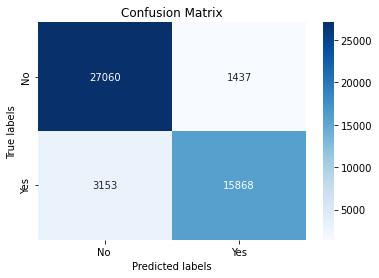

In [ ]:
%%time
from sklearn.metrics import confusion_matrix
import seaborn as sns 

print("Fitting our model to the train set")
fit_forest = best_forest.fit(X_train, y_train)
print("Creating predicted variables to compare against y_test")

y_pred = fit_forest.predict(X_test)
# making classification report and confusion matrix
print(classification_report(y_test, y_pred))

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', ) # for decimal

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No ', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier

In [ ]:
result = []
for m in ['log', 'hinge','modified_huber', 'squared_hinge', 'perceptron']:
    clf.loss = m
    print(clf)
    for i in [1E-2, 1E-1, 1e0, 1e1, 1e2, 1e3]: # Full List
    # for i in [1E-1, 1e0]:
#         print(i)
#         clf.alpha = i
        clf = SGDClassifier(loss=m, alpha=i, penalty="l2", max_iter=1000)
        print(clf)
        print("Fitting")
        clf_Fit = clf.fit(X_train, y_train)
        print("Scoring")
        clf_Score = clf.score(X_test, y_test)
#         print(clf_Score)
#         print("Predicting")
#         clf_preds = clf.predict(X_test)
        print(m, i, clf_Score)
        print("Appending to Dict")
        result.append({
            "Loss": m,
            'Alpha': i,
            'Model_Fit': clf,
            'Score': clf_Score,
#             'Preds': clf_preds,
            })

result = pd.DataFrame(result)
resultDF = result.sort_values(by='Score', ascending=False)
display(resultDF)  
# result.to_csv(r'result.csv')


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_split': [2, 4, 9],
                                        'n_estimators': [10, 50, 100, 300,
                                                         500]},
                   scoring='recall_macro')
SGDClassifier(alpha=0.01, loss='log')
Fitting
Scoring
log 0.01 0.685992676459447
Appending to Dict
SGDClassifier(alpha=0.1, loss='log')
Fitting
Scoring
log 0.1 0.7015657224630666
Appending to Dict
SGDClassifier(alpha=1.0, loss='log')
Fitting
Scoring
log 1.0 0.7005766235952692
Appending to Dict
SGDClassifier(alpha=10.0, loss='log')
Fitting
Scoring
log 10.0 0.6474809545856307
Appending to Dict
SGDClassifier(alpha=100.0, loss='log')
Fitting
Scoring
log 100.0 0.6862452123405868
Appending to Dict
SGDClassifier(alpha=1000.0, loss='log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Scoring
squared_hinge 0.1 0.5873774148743633
Appending to Dict
SGDClassifier(alpha=1.0, loss='squared_hinge')
Fitting


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Scoring
squared_hinge 1.0 0.6081905804116335
Appending to Dict
SGDClassifier(alpha=10.0, loss='squared_hinge')
Fitting


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Scoring
squared_hinge 10.0 0.6023401658318953
Appending to Dict
SGDClassifier(alpha=100.0, loss='squared_hinge')
Fitting


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Scoring
squared_hinge 100.0 0.5977945199713792
Appending to Dict
SGDClassifier(alpha=1000.0, loss='squared_hinge')
Fitting
Scoring
squared_hinge 1000.0 0.620059766825203
Appending to Dict
SGDClassifier(alpha=1000.0, loss='perceptron')
SGDClassifier(alpha=0.01, loss='perceptron')
Fitting
Scoring
perceptron 0.01 0.6284355402163391
Appending to Dict
SGDClassifier(alpha=0.1, loss='perceptron')
Fitting
Scoring
perceptron 0.1 0.6019824066669472
Appending to Dict
SGDClassifier(alpha=1.0, loss='perceptron')
Fitting
Scoring
perceptron 1.0 0.6047182120459615
Appending to Dict
SGDClassifier(alpha=10.0, loss='perceptron')
Fitting
Scoring
perceptron 10.0 0.6480070710046719
Appending to Dict
SGDClassifier(alpha=100.0, loss='perceptron')
Fitting
Scoring
perceptron 100.0 0.4916452712656257
Appending to Dict
SGDClassifier(alpha=1000.0, loss='perceptron')
Fitting
Scoring
perceptron 1000.0 0.4528810135106696
Appending to Dict


,Loss,Alpha,Model_Fit,Score
6,hinge,0.01,SGDClassifier(alpha=0.01),0.706932
8,hinge,1.00,SGDClassifier(alpha=1.0),0.702639
1,log,0.10,"SGDClassifier(alpha=0.1, loss='log')",0.701566
7,hinge,0.10,SGDClassifier(alpha=0.1),0.701124
2,log,1.00,"SGDClassifier(alpha=1.0, loss='log')",0.700577
12,modified_huber,0.01,"SGDClassifier(alpha=0.01, loss='modified_huber')",0.700324
13,modified_huber,0.10,"SGDClassifier(alpha=0.1, loss='modified_huber')",0.697672
14,modified_huber,1.00,"SGDClassifier(alpha=1.0, loss='modified_huber')",0.695736
10,hinge,100.00,SGDClassifier(alpha=100.0),0.689023
4,log,100.00,"SGDClassifier(alpha=100.0, loss='log')",0.686245


In [ ]:
# XGD Boost
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [ ]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
num_round = 100 # Test
param = {
    'max_depth': 10,
    'objective': 'multi:softmax',
    'num_class': 10,
    'eta': 0.3    }
param

{'eta': 0.3, 'max_depth': 10, 'num_class': 10, 'objective': 'multi:softmax'}

In [ ]:
my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[0]	eval-merror:0.145587	train-merror:0.124231
Multiple eval metrics have been passed: 'train-merror' will be used for early stopping.

Will train until train-merror hasn't improved in 5 rounds.
[1]	eval-merror:0.133802	train-merror:0.110657
[2]	eval-merror:0.122038	train-merror:0.096308
[3]	eval-merror:0.112715	train-merror:0.085629
[4]	eval-merror:0.106591	train-merror:0.07946
[5]	eval-merror:0.102782	train-merror:0.074192
[6]	eval-merror:0.099478	train-merror:0.069935
[7]	eval-merror:0.09649	train-merror:0.066057
[8]	eval-merror:0.092554	train-merror:0.061322
[9]	eval-merror:0.091586	train-merror:0.058787
[10]	eval-merror:0.089271	train-merror:0.056424
[11]	eval-merror:0.087925	train-merror:0.054404
[12]	eval-merror:0.086683	train-merror:0.052997
[13]	eval-merror:0.086052	train-merror:0.051861
[14]	eval-merror:0.085462	train-merror:0.050336
[15]	eval-merror:0.084389	train-merror:0.049471
[16]	eval-merror:0.083379	train-merror:0.048469
[17]	eval-merror:0.082663	train-merror:0.046999


In [ ]:
print(my_model.best_iteration)
print(my_model.best_score)
# eta .01 = 0.069
# eta .03 = 0.001416


99
0.001416


In [ ]:
out = xgb.cv(params=param, 
             dtrain=dtrain, 
             num_boost_round=3500, 
             nfold=3, 
             verbose_eval=True, 
             early_stopping_rounds=100)

[0]	train-merror:0.13045+0.00258297	test-merror:0.159009+0.00349765
[1]	train-merror:0.109372+0.00121147	test-merror:0.140853+0.00296038
[2]	train-merror:0.095117+0.00179089	test-merror:0.130166+0.00313804
[3]	train-merror:0.0852637+0.00147541	test-merror:0.122391+0.00302178
[4]	train-merror:0.0769657+0.000889626	test-merror:0.116015+0.00152465
[5]	train-merror:0.0715903+0.00104502	test-merror:0.111243+0.00199119
[6]	train-merror:0.065976+0.000927931	test-merror:0.107338+0.00193569
[7]	train-merror:0.0617637+0.00108707	test-merror:0.10392+0.00220405
[8]	train-merror:0.0583003+0.00110067	test-merror:0.101629+0.00168753
[9]	train-merror:0.055288+0.000880184	test-merror:0.0995273+0.00157925
[10]	train-merror:0.0530017+0.000630295	test-merror:0.0978317+0.00165831
[11]	train-merror:0.051049+0.000976996	test-merror:0.096145+0.00149362
[12]	train-merror:0.0491597+0.000659805	test-merror:0.0946477+0.0013498
[13]	train-merror:0.0472657+0.00114491	test-merror:0.0935837+0.000873632
[14]	train-mer

In [ ]:
out.tail()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
724,0.0,0.0,0.065281,0.000564
725,0.0,0.0,0.065336,0.000560
726,0.0,0.0,0.065300,0.000610
727,0.0,0.0,0.065272,0.000593
728,0.0,0.0,0.065218,0.000630


In [ ]:
out.iloc[-1]

train-merror-mean    0.000000
train-merror-std     0.000000
test-merror-mean     0.065218
test-merror-std      0.000630
Name: 728, dtype: float64

In [ ]:
out.sort_values(by='test-merror-mean', ascending=True)

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
728,0.000000,0.000000,0.065218,0.000630
685,0.000000,0.000000,0.065227,0.000533
727,0.000000,0.000000,0.065272,0.000593
692,0.000000,0.000000,0.065273,0.000524
724,0.000000,0.000000,0.065281,0.000564
...,...,...,...,...
4,0.076966,0.000890,0.116015,0.001525
3,0.085264,0.001475,0.122391,0.003022
2,0.095117,0.001791,0.130166,0.003138
1,0.109372,0.001211,0.140853,0.002960


In [ ]:
my_model.predict(dtest)

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

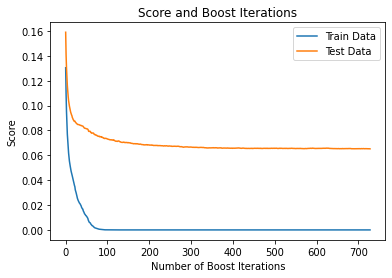

In [ ]:
plt.plot(out['train-merror-mean'], label='Train Data')
plt.plot(out['test-merror-mean'], label='Test Data')
plt.ylabel('Score') 
plt.xlabel('Number of Boost Iterations') 
plt.title("Score and Boost Iterations")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

XGBoost_AC = accuracy_score(my_model.predict(dtest), y_test)
print("The Best XG Boost Accuracy Score is:", XGBoost_AC)
# .01 eta - 0.9311208384191254
# .03 eta - 0.931499642240835

The Best XG Boost Accuracy Score is: 0.931499642240835


In [41]:
# NN
import tensorflow as tf
# y_test
# y_train

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

model_Classify = tf.keras.Sequential()
model_Classify.add(tf.keras.Input(shape=(45,)))
model_Classify.add(tf.keras.layers.Dense(500, activation='sigmoid', kernel_initializer='zeros'))  # adds a layer with 500 neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(250, activation='sigmoid'))   # adds a layer with 250` neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(100, activation='sigmoid'))   # adds a layer with 100 neurons, sigmoid activation
model_Classify.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, sigmoid

model_Classify.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

model_Classify.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25, batch_size=25, callbacks=[es])

Epoch 1/25
4435/4435 [==============================] - 19s 4ms/step - loss: 0.5882 - accuracy: 0.6882 - val_loss: 0.5519 - val_accuracy: 0.7186
Epoch 2/25
4435/4435 [==============================] - 14s 3ms/step - loss: 0.5085 - accuracy: 0.7591 - val_loss: 0.4669 - val_accuracy: 0.7905
Epoch 3/25
4435/4435 [==============================] - 17s 4ms/step - loss: 0.4310 - accuracy: 0.8116 - val_loss: 0.3924 - val_accuracy: 0.8384
Epoch 4/25
4435/4435 [==============================] - 14s 3ms/step - loss: 0.3515 - accuracy: 0.8547 - val_loss: 0.3173 - val_accuracy: 0.8705
Epoch 5/25
4435/4435 [==============================] - 17s 4ms/step - loss: 0.2907 - accuracy: 0.8825 - val_loss: 0.2643 - val_accuracy: 0.8955
Epoch 6/25
4435/4435 [==============================] - 14s 3ms/step - loss: 0.2456 - accuracy: 0.9030 - val_loss: 0.2236 - val_accuracy: 0.9124
Epoch 7/25
4435/4435 [==============================] - 17s 4ms/step - loss: 0.2114 - accuracy: 0.9184 - val_loss: 0.2027 - val_ac

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

model_Classify2 = tf.keras.Sequential()
model_Classify2.add(tf.keras.Input(shape=(45,)))
model_Classify2.add(tf.keras.layers.Dense(500, activation='sigmoid', kernel_initializer='zeros'))  # adds a layer with 500 neurons, sigmoid activation
model_Classify2.add(tf.keras.layers.Dense(250, activation='sigmoid'))   # adds a layer with 250` neurons, sigmoid activation
model_Classify2.add(tf.keras.layers.Dense(100, activation='sigmoid'))   # adds a layer with 100 neurons, sigmoid activation
model_Classify2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # adds a layer with 1 neurons, sigmoid

model_Classify2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

model_Classify2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=25, batch_size=25, callbacks=[es])

Epoch 1/25
4435/4435 [==============================] - 15s 3ms/step - loss: 0.2769 - accuracy: 0.8821 - val_loss: 0.1792 - val_accuracy: 0.9326
Epoch 2/25
4435/4435 [==============================] - 15s 3ms/step - loss: 0.1539 - accuracy: 0.9427 - val_loss: 0.1360 - val_accuracy: 0.9517
Epoch 3/25
4435/4435 [==============================] - 15s 3ms/step - loss: 0.1267 - accuracy: 0.9556 - val_loss: 0.1365 - val_accuracy: 0.9520


In [61]:
print(f"The following is the Accuracy from the Sequential Neural Network {model_Classify2.history.history['accuracy'][-1]:.3%} ")
print(f"With a Loss of {model_Classify2.history.history['loss'][-1]:.3%}")

The following is the Accuracy from the Sequential Neural Network 95.558% 
With a Loss of 12.665%


In [62]:
model_Classify2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               23000     
                                                                 
 dense_9 (Dense)             (None, 250)               125250    
                                                                 
 dense_10 (Dense)            (None, 100)               25100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 173,451
Trainable params: 173,451
Non-trainable params: 0
_________________________________________________________________


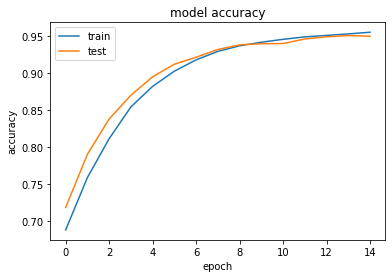

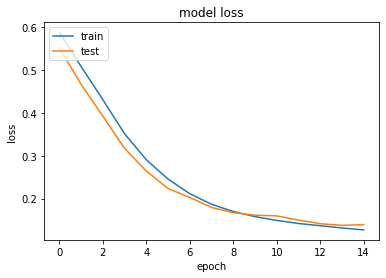

In [63]:
# print(model_Classify.history.history.keys())
# summarize history for accuracy
plt.plot(model_Classify.history.history['accuracy'])
plt.plot(model_Classify.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_Classify.history.history['loss'])
plt.plot(model_Classify.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
model_Classify2_preds = model_Classify2.predict(X_test)

In [48]:
# making classification report and confusion matrix
model_Classify2_preds = (model_Classify2_preds > 0.5).astype(int)


In [49]:
model_Classify2_preds_DF = pd.DataFrame(model_Classify2_preds)
print(model_Classify2_preds_DF.shape)
print(len(X_test))

(47518, 1)
47518


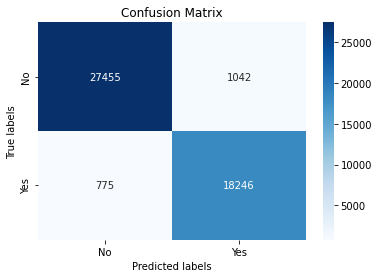

In [50]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm = confusion_matrix(y_test, model_Classify2_preds_DF)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', ) # for decimal

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

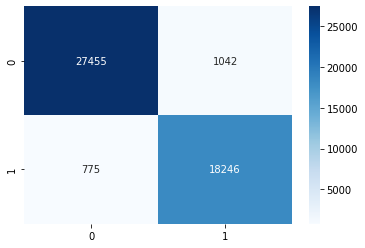

In [51]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', ) # for decimal

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [ ]:
### Cost Loss / Win 

In [ ]:
# Accuracy times Shape
# True Postive
# False Postive
# Need to Reveiw The LEcture before you write it up
